In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [20]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

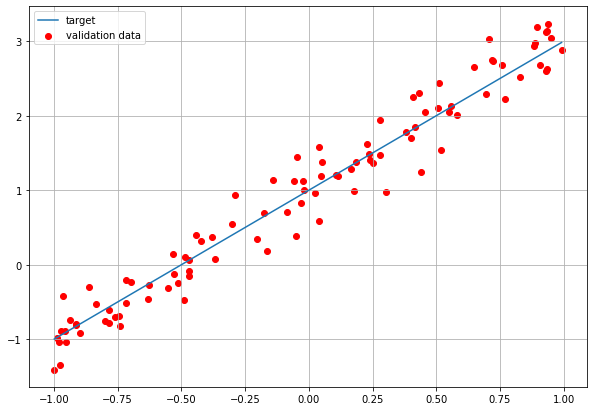

In [21]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [23]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
20/20 [==============================] - 1s 12ms/step - loss: 1.0826 - mse: 1.0826 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6277 - mse: 0.6277 - val_loss: 0.5222 - val_mse: 0.5222
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.4011 - mse: 0.4011 - val_loss: 0.3611 - val_mse: 0.3611
Epoch 4/30
20/20 [==============================] - 0s 5ms/step - loss: 0.2828 - mse: 0.2828 - val_loss: 0.2711 - val_mse: 0.2711
Epoch 5/30
20/20 [==============================] - 0s 4ms/step - loss: 0.2166 - mse: 0.2166 - val_loss: 0.2161 - val_mse: 0.2161
Epoch 6/30
20/20 [==============================] - 0s 6ms/step - loss: 0.1767 - mse: 0.1767 - val_loss: 0.1802 - val_mse: 0.1802
Epoch 7/30
20/20 [==============================] - 0s 4ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 0.1552 - val_mse: 0.1552
Epoch 8/30
20/20 [==============================] - 0s 4ms/step - loss: 0.1337 - mse: 0.1

In [25]:
# return weights and biases
model.get_weights()

[array([[1.9846938]], dtype=float32), array([1.0045913], dtype=float32)]

In [26]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.0749 - mse: 0.0749

Test loss: 0.07485204935073853
Test accuracy: 0.07485204935073853


In [30]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 6ms/step - loss: 1.1745e-04 - mse: 1.1745e-04

Test loss: 0.00011744949733838439
Test accuracy: 0.00011744949733838439


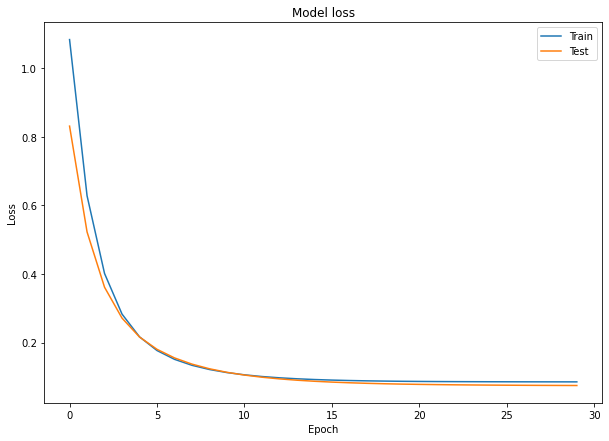

In [28]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

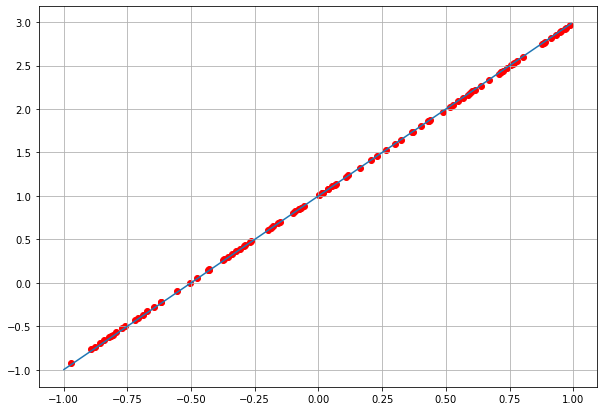

In [29]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()